Mean Absolute Error (MAE): 0.629908653009376
R² Score: 0.45885918903846656
Coefficient (Slope): [0.41933849]
Intercept: 0.44459729169078677


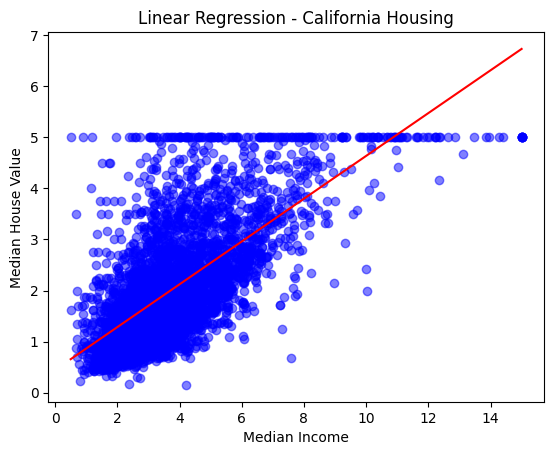

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.datasets import fetch_california_housing

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseValue'] = data.target

# Feature and target
X = df[['MedInc']]
y = df['MedHouseValue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Coefficient (Slope):", model.coef_)
print("Intercept:", model.intercept_)

# Plot (sorted for clean line)
X_test_sorted = X_test.sort_values(by='MedInc')
y_pred_sorted = model.predict(X_test_sorted)

plt.scatter(X_test, y_test, color='blue', alpha=0.5)
plt.plot(X_test_sorted, y_pred_sorted, color='red')
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Linear Regression - California Housing")
plt.show()
